## Cats Vs Dogs Deep Learning assignment


## Part 1 - Josiah Jackson

In [ ]:
# upload kaggle api file
# (Note to Bob - get API token downloaded from kaggle prior to starting)
from google.colab import files
uploaded = files.upload()

# Rename the uploaded file to kaggle.json
import os

# Get the uploaded filename
filename = next(iter(uploaded))

# Rename the uploaded file to kaggle.json
os.rename(filename, 'kaggle.json')

# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json




In [ ]:
# download 'dogs-vs-cats' kaggle dataset
!kaggle competitions download -c dogs-vs-cats

# unzip the training file
!unzip -qq train.zip

 64% 520M/812M [00:27<00:15, 19.8MB/s]
User cancelled operation
unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.


2000 training images, 1000 validation images, 2000 test images - followed chapter to get code

In [ ]:
import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

# code obtained directly from textbook 8.2.2
def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
              for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
                      dst=dir / fname)
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


Rescale and use architecture provided from assignment/textbook

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(180, 180, 3)) #1
x = layers.Rescaling(1./255)(inputs) #2
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# viewing dimensions of each layer
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

## Compile the Model

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
# Create Train/Test Set
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
  new_base_dir / "train",
  image_size=(180, 180),
  batch_size=32)
validation_dataset = image_dataset_from_directory(
  new_base_dir / "validation",
  image_size=(180, 180),
  batch_size=32)
test_dataset = image_dataset_from_directory(
  new_base_dir / "test",
  image_size=(180, 180),
  batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## Callbacks and History - 30 epochs

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")
]

In [ ]:
history = model.fit(
  train_dataset,
  epochs=30,
  validation_data=validation_dataset,
  callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 218s 3s/step - loss: 0.5704 - accuracy: 0.7180 - val_loss: 0.7314 - val_accuracy: 0.6160
Epoch 2/30
63/63 [==============================] - 217s 3s/step - loss: 0.5566 - accuracy: 0.7215 - val_loss: 0.5884 - val_accuracy: 0.6940
Epoch 3/30
63/63 [==============================] - 219s 3s/step - loss: 0.5008 - accuracy: 0.7640 - val_loss: 0.5470 - val_accuracy: 0.7330
Epoch 4/30
63/63 [==============================] - 215s 3s/step - loss: 0.4748 - accuracy: 0.7685 - val_loss: 0.5488 - val_accuracy: 0.7250
Epoch 5/30
63/63 [==============================] - 198s 3s/step - loss: 0.4198 - accuracy: 0.8070 - val_loss: 0.5736 - val_accuracy: 0.7270
Epoch 6/30
63/63 [==============================] - 215s 3s/step - loss: 0.3910 - accuracy: 0.8240 - val_loss: 0.6407 - val_accuracy: 0.7240
Epoch 7/30
63/63 [==============================] - 233s 4s/step - loss: 0.3431 - accuracy: 0.8430 - val_loss: 0.8760 - val_accuracy: 0.6840
Epoch 8/30
63

## Plot Accuracy and Loss for training/validation

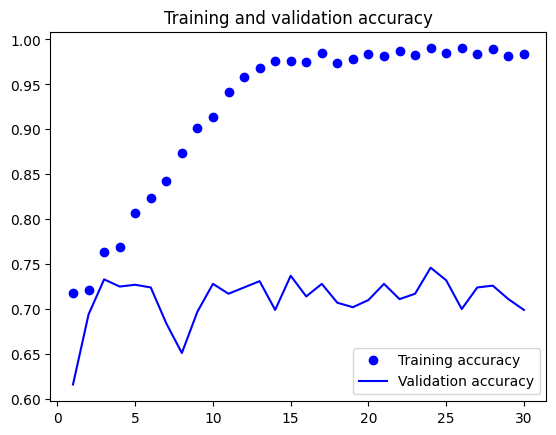

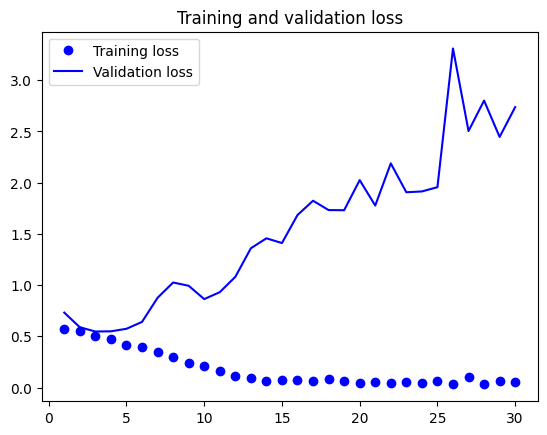

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Evaluate Model

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 51s 785ms/step - loss: 0.5634 - accuracy: 0.7145
Test accuracy: 0.715


## Data augmentation and drop out

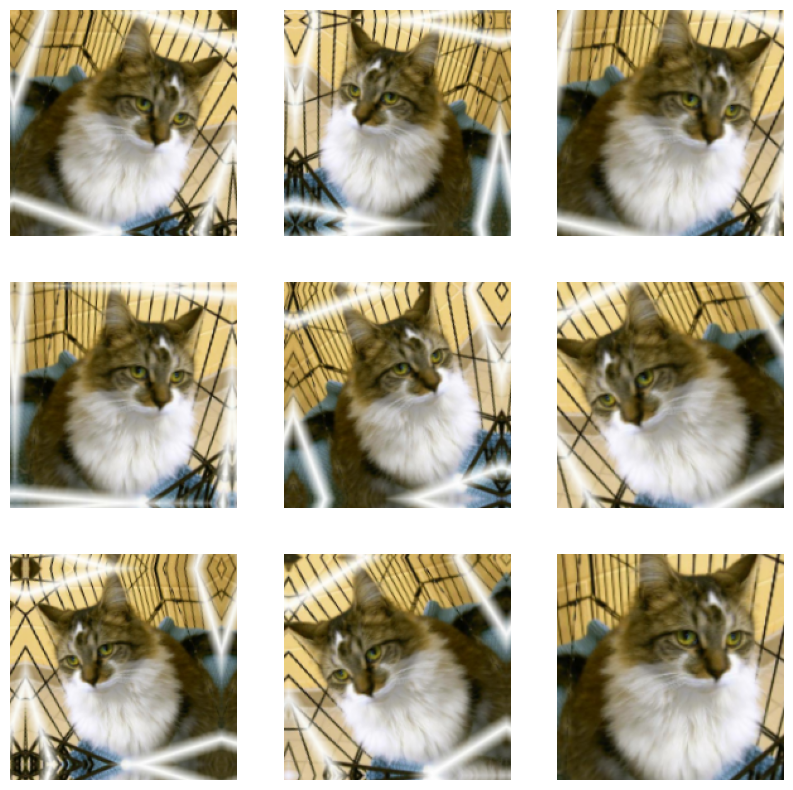

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

# plot a few
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

## New Convnet - augmentation/drop out

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

model2.compile(loss="binary_crossentropy",
                  optimizer="rmsprop",
                  metrics=["accuracy"])

## Train New Convnet

In [ ]:
callbacks2 = [
  keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch_with_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
]

history2 = model2.fit(
          train_dataset,
          epochs=80,
          validation_data=validation_dataset,
          callbacks=callbacks2)

Epoch 1/80
63/63 [==============================] - 233s 4s/step - loss: 0.7030 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/80
63/63 [==============================] - 232s 4s/step - loss: 0.6948 - accuracy: 0.5105 - val_loss: 0.6916 - val_accuracy: 0.6070
Epoch 3/80
63/63 [==============================] - 233s 4s/step - loss: 0.6932 - accuracy: 0.5280 - val_loss: 0.7036 - val_accuracy: 0.5020
Epoch 4/80
63/63 [==============================] - 233s 4s/step - loss: 0.6870 - accuracy: 0.5760 - val_loss: 0.6795 - val_accuracy: 0.5680
Epoch 5/80
63/63 [==============================] - 231s 4s/step - loss: 0.6647 - accuracy: 0.6205 - val_loss: 0.6535 - val_accuracy: 0.6190
Epoch 6/80
63/63 [==============================] - 230s 4s/step - loss: 0.6569 - accuracy: 0.6285 - val_loss: 0.6215 - val_accuracy: 0.6790
Epoch 7/80
63/63 [==============================] - 227s 4s/step - loss: 0.6216 - accuracy: 0.6595 - val_loss: 0.6550 - val_accuracy: 0.6020
Epoch 8/80
63

## Plot new model

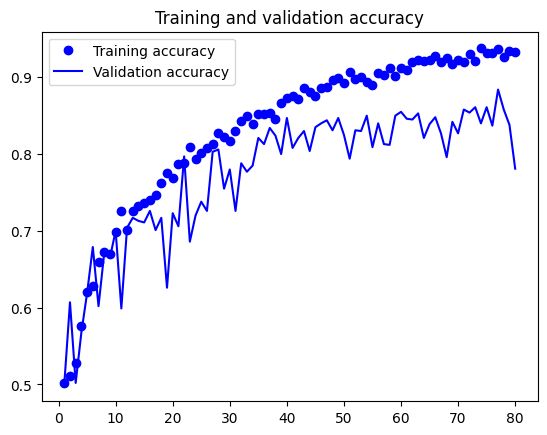

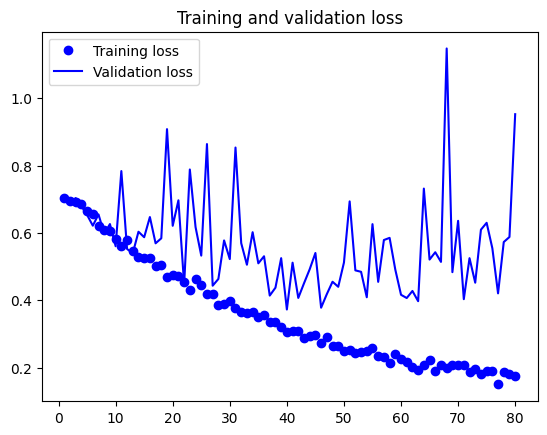

In [ ]:
import matplotlib.pyplot as plt
accuracy2 = history2.history["accuracy"]
val_accuracy2 = history2.history["val_accuracy"]
loss2 = history2.history["loss"]
val_loss2 = history2.history["val_loss"]
epochs2 = range(1, len(accuracy2) + 1)
plt.plot(epochs2, accuracy2, "bo", label="Training accuracy")
plt.plot(epochs2, val_accuracy2, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs2, loss2, "bo", label="Training loss")
plt.plot(epochs2, val_loss2, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Model evaluation

In [ ]:
test_model2 = keras.models.load_model(
"convnet_from_scratch_with_augmentation.keras")
test_loss2, test_acc2 = test_model2.evaluate(test_dataset)
print(f"Test accuracy: {test_acc2:.3f}")

NameError: name 'keras' is not defined

## Part 2 - Bob Rosen

In [ ]:
# Download the Cassava Disease dataset
#!kaggle competitions download -c cassava-disease --force

# upload kaggle api file
# (Note to Bob - get API token downloaded from kaggle prior to starting)
from google.colab import files
uploaded = files.upload()

# Rename the uploaded file to kaggle.json
import os

# Get the uploaded filename
filename = next(iter(uploaded))

# Rename the uploaded file to kaggle.json
os.rename(filename, 'kaggle.json')

# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# download 'dogs-vs-cats' kaggle dataset
!kaggle competitions download -c cassava-disease

 99% 2.29G/2.30G [00:25<00:00, 99.6MB/s]
100% 2.30G/2.30G [00:25<00:00, 97.4MB/s]


In [ ]:
# Unzip the training dataset
!unzip cassava-disease.zip

Archive:  cassava-disease.zip
  inflating: extraimages.zip         
  inflating: random.txt              
  inflating: sample_submission_file.csv  
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
!unzip -qq train.zip
!unzip -qq test.zip

## Modifying cats vs dogs code to work for leaves dataset

In [ ]:
import os
import shutil
import pathlib

# Function to empty a directory
def empty_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            os.remove(os.path.join(root, file))
        for dir in dirs:
            shutil.rmtree(os.path.join(root, dir))

original_train_dir = pathlib.Path("train")
original_test_dir = pathlib.Path("test")
new_base_dir = pathlib.Path("cassava")

# Empty the directories if they exist
if new_base_dir.exists():
    empty_directory(new_base_dir)

def make_subset(subset_name, start_index=None, end_index=None):
        for category in ("cbb", "cmd", "cbsd", "cgm", "healthy"):
            src_dir = original_train_dir / category
            dst_dir = new_base_dir / subset_name / category
            os.makedirs(dst_dir, exist_ok=True)
            for fname in os.listdir(src_dir):
                src_file = src_dir / fname
                if os.path.isfile(src_file):  # Check if it's a file
                    shutil.copyfile(src=src_file, dst=dst_dir / fname)

make_subset("train")
make_subset("test")

# Count the number of files in train and test directories - had chatgpt help with this
def count_files(directory):
    return sum(len(files) for _, _, files in os.walk(directory))

train_dir = "cassava/train"

train_count = count_files(train_dir)

print(f"Number of images copied to train directory: {train_count}")
print(f"Contents of cassava directory: {os.listdir('cassava')}")


Number of images copied to train directory: 5656
Contents of cassava directory: ['test', 'train']


In [ ]:
import os
import shutil
import pathlib
import random

# splitting the validation set from the provided values given in paper
# Path definitions
train_dir = pathlib.Path("cassava/train")
validation_dir = pathlib.Path("cassava/validation")
test_dir = pathlib.Path("cassava/test")

#  Stratification
# Class distribution according to the order: cbb, cmd, cbsd, cgm, healthy
class_counts = {
    "cbb": {"train": 311, "test": 155},
    "cmd": {"train": 1773, "test": 886},
    "cbsd": {"train": 963, "test": 481},
    "cgm": {"train": 516, "test": 258},
    "healthy": {"train": 211, "test": 105}
}

# Function to split the training subset into training and validation sets
def split_train_validation(train_dir, validation_dir, validation_ratio=0.2):
    # Ensure validation directory exists
    os.makedirs(validation_dir, exist_ok=True)

    # Remove existing files in the validation directory
    for class_name in class_counts.keys():
        validation_class_dir = validation_dir / class_name
        if validation_class_dir.exists():
            shutil.rmtree(validation_class_dir)

    # Iterate over each class
    for class_name, counts in class_counts.items():
        train_count = counts["train"]
        validation_count = int(train_count * validation_ratio)

        # Create directories for the class in both train and validation directories
        os.makedirs(train_dir / class_name, exist_ok=True)
        os.makedirs(validation_dir / class_name, exist_ok=True)

        # Get list of image files for the class
        images = list((train_dir / class_name).glob("*.jpg"))

        # Randomly shuffle the images
        random.shuffle(images)

        # Select images for validation set
        validation_images = images[:validation_count]

        # Move validation images to the validation directory
        for img_path in validation_images:
            shutil.move(img_path, validation_dir / class_name / img_path.name)

# Call the function to split the training subset
split_train_validation(train_dir, validation_dir)

# Print the number of images in the training and validation sets
def count_images(directory):
    count = sum(len(files) for _, _, files in os.walk(directory))
    return count

print("Number of images in the training set:", count_images(train_dir))
print("Number of images in the validation set:", count_images(validation_dir))

print("Number of images in the validation set:", count_images(test_dir))

Number of images in the training set: 4903
Number of images in the validation set: 753
Number of images in the validation set: 5656


In [ ]:
# Create Train/Test Set
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
  new_base_dir / "train",
  image_size=(180, 180),
  batch_size=32)
validation_dataset = image_dataset_from_directory(
  new_base_dir / "validation",
  image_size=(180, 180),
  batch_size=32)
test_dataset = image_dataset_from_directory(
  new_base_dir / "test",
  image_size=(180, 180),
  batch_size=32)

Found 4903 files belonging to 5 classes.
Found 753 files belonging to 5 classes.
Found 5656 files belonging to 5 classes.


In [ ]:
# ChatGPT created to see labels
import numpy as np

# Define a function to get class names from label indices
def get_class_names(labels, class_names):
    return [class_names[label] for label in labels]

# Define class names
class_names = train_dataset.class_names

# Iterate over the dataset and print labels
for images, labels in train_dataset:
    print("Labels inferred by the dataset:")
    print(get_class_names(labels.numpy(), class_names))
    break  # Print labels only for the first batch


Labels inferred by the dataset:
['cbb', 'cmd', 'cbsd', 'cbb', 'cmd', 'cbsd', 'cmd', 'healthy', 'cbsd', 'cmd', 'cbb', 'cbb', 'healthy', 'cbsd', 'cbsd', 'cmd', 'cbb', 'cbsd', 'cmd', 'cgm', 'cmd', 'cbsd', 'healthy', 'cgm', 'cgm', 'cmd', 'cbsd', 'cmd', 'cbsd', 'cmd', 'cmd', 'cmd']


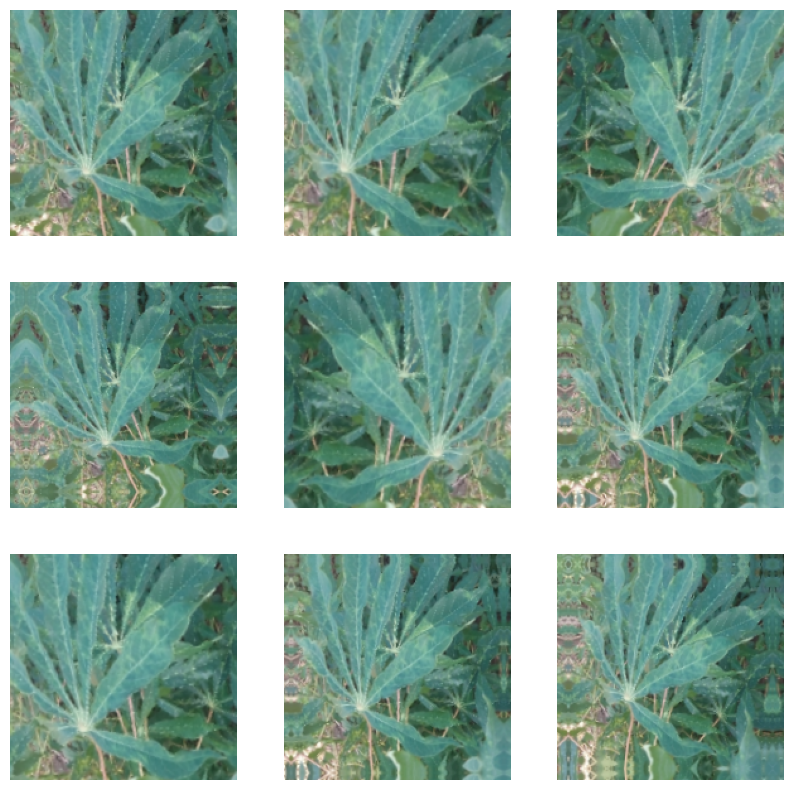

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

# plot a few
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")


# Works - but ~8-10 minutes per epoch

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(5, activation="softmax")(x) # changed to 5 outputs (5 classes) and softmax
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",  # switched to sparse categorical cross-entropy loss
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks3 = [
  keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch_with_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
]

history3 = model.fit(
          train_dataset,
          epochs = 37,
          validation_data=validation_dataset,
          callbacks=callbacks3)


Epoch 1/37


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 252, in __call__
        self.build(y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 194, in build
        self._losses = tf.nest.map_structure(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 365, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2965, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2912, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/saving/legacy/serialization.py", line 537, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'weight_loss'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


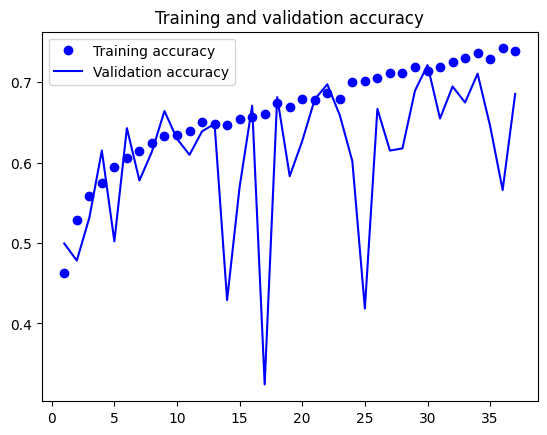

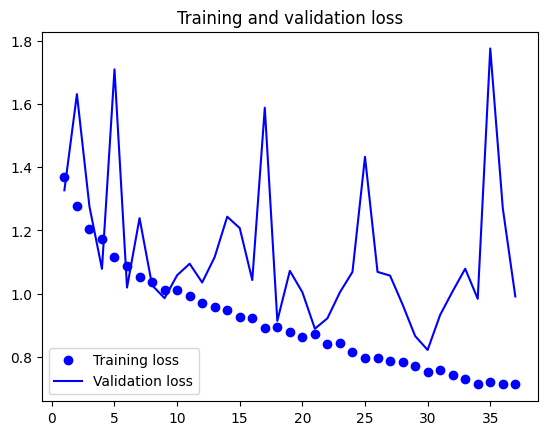

In [ ]:
import matplotlib.pyplot as plt
accuracy = history3.history["accuracy"]
val_accuracy = history3.history["val_accuracy"]
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model3 = keras.models.load_model(
"convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model3.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

177/177 [==============================] - 141s 785ms/step - loss: 0.6867 - accuracy: 0.7495
Test accuracy: 0.749


Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node loss/mul_1 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-23-18295876360d>", line 61, in <cell line: 61>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "<ipython-input-23-18295876360d>", line 20, in loss

Incompatible shapes: [32] vs. [5]
	 [[{{node loss/mul_1}}]] [Op:__inference_train_function_73181]